# Model based on CNN with EDA
 
**Author:** [Erik Matovič](https://github.com/Matovic)  
**Dataset:** https://www.kaggle.com/andrewmvd/medical-mnist [1]   
## Exploratory Data Analysis

### Choosing random data from each class to display

 - in this section, inspiration comes from the article [Exploratory Data Analysis Ideas for Image Classification](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2) [2]
 - first of all, we need to get the names of all subfolders in our data folder:  

In [1]:
import os

data_dir = '../data/' # image folder

data_folders = [name for name in os.listdir(data_dir) if os.path.isdir(data_dir + name)]
data_folders

['Hand', 'AbdomenCT', 'HeadCT', 'train', 'BreastMRI', 'ChestCT', 'CXR', 'test']

 - we take a look at three randomly chosen images and count the total number of our data 
 - we have 58954 medical images as our data 
 - the only class with less than ten-thousand medical images is the BreastMRI class
 - the color space of images is grayscale(8-bits), L mode in the instance of PIL image
 - all randomly chosen medical images have the same height and width, which both of them are 100 pixels
 - the output of the cell also contains additional information about the randomly chosen medical images
 - some medical images appear to have a lower quality by raw comparison
 - the proof of the lower quality of some medical images is with the minimal and maximum pixels; some medical images use the full range of the eight-bit grayscale channel(256 values ranging from 0 to 255), which have more quality
 - however, some medical images have the minimum value of the pixel around 100, which means the quality of the black color of the background has less quality in comparison with the minimal value set on the zero, and some medical images do not have the maximum value set on 255, which means the saturation of white color has less quality in comparison with the maximum value set on the 255

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

all_data = 0 # counter
classes = dict()

# get data from each folder
for folder in data_folders:
    # skip train and test folders
    if (folder == "train" or folder == "test"):
        continue
    
    # get the list of jpegs from sub image class folders
    imgs = [fn for fn in os.listdir(data_dir + folder) if fn.endswith('.jpeg')]

    # randomly select 3 images from folder
    random_select = np.random.choice(imgs, 3, replace = False)
    
    # plotting 1 x 3 image matrix
    fig = plt.figure(figsize = (8,6))
    for i in range(3):
        fp = data_dir + folder + '/' + random_select[i]
        ax = fig.add_subplot(1, 3, i+1)

        # to plot without rescaling, remove target_size
        fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
        print("Image's color model is:", fn.mode)
        print("Image's size is(width, height):", fn.size)
        print("Image's info:", fn.info)
        print("Image's pixel values(min, max):", fn.getextrema())
        plt.imshow(fn, cmap='Greys_r')
        plt.title(folder)
        plt.axis('off')
    plt.show()

    # also check the number of files here
    all_data += len(imgs)
    classes[folder] = len(imgs)
    print(f'{data_dir + folder} has {len(imgs)} files')

print(f'We have {all_data} images in total')

NameError: name 'data_folders' is not defined

### The number of medical images by individual classes

 - in this subsection of the exploratory data analysis, we have graphically represented the number of medical images by individual classes, classes of Hand, AbdomenCT, HradCT, ChestCT, and CXR have the same amount of data, which is ten-thousand medical images, and the only class with fewer medical images is BreastMRI class with 8954 medical images

<AxesSubplot:>

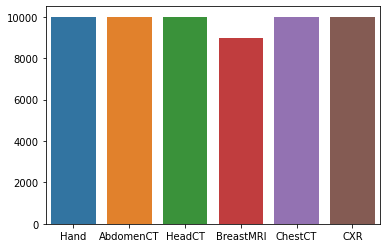

In [3]:
import seaborn as sns

keys = list(classes.keys())

no_img = [classes[key] for key in keys] # get number of images in the same order as keys
sns.barplot(x=keys, y=no_img)

### Dividing a dataset into a training and test subset 
- before we start making our model, it is essential to divide our dataset into the training and testing data

In [4]:
import shutil
import os
import numpy as np

for folder in data_folders:
    # skip train and test folders
    if (folder == "train" or folder == "test"):
        continue
        
    # if directory exist, skip
    if (os.path.isdir(data_dir +'train/' + folder)):
        continue
        
    # otherwise create one
    os.makedirs(data_dir +'train/' + folder)
    os.makedirs(data_dir +'test/' + folder)
    source_dir = data_dir + folder
    allFileNames = os.listdir(source_dir)
    np.random.shuffle(allFileNames)
    
    # 20% of our medical images is test data
    test_ratio = 0.20

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])
    
    train_FileNames = [source_dir + '/' + name for name in train_FileNames.tolist()]
    test_FileNames = [source_dir + '/' + name for name in test_FileNames.tolist()]
    
    for name in train_FileNames:
      shutil.copy(name, data_dir +'train/' + folder)
    for name in test_FileNames:
      shutil.copy(name, data_dir +'test/' + folder)
print('Done!')

Done!


 - we divided the data into the training data with 80% of the total medical images and testing data with 20% of the total medical images 
 - additional information within the exploratory data analysis:
     - images dimension: 64x64
     - 47163 images represent 80% of our dataset, which is within the training subset, 20% of our dataset is in the testing subset
     - six classes in the classification: Hand, AbdomenCT, HeadCT, BreastMRI, ChestCT, CXR

In [5]:
from PIL import Image

# set paths for the dataset
train_dir = '../data/train/'
test_dir = '../data/test/'

# get class names, equal as data_folders upper
class_names = os.listdir(train_dir)  
class_names_test = os.listdir(test_dir)  

# get a number of classes, which is a number of subdirectories
no_classes = len(class_names)        

# get list of images' filenames based on classes
# list has lenght of no_classes and each index have imgs of a class
images_classes = list(range(no_classes))
for i in range(0, no_classes, 1):
    images_classes[i] = list()
    for x in os.listdir(os.path.join(train_dir, class_names[i])):
        images_classes[i].append(os.path.join(train_dir, class_names[i], x))

        
images_classes_test = list(range(no_classes))
for i in range(0, no_classes, 1):
    images_classes_test[i] = list()
    for x in os.listdir(os.path.join(test_dir, class_names_test[i])):
        images_classes_test[i].append(os.path.join(test_dir, class_names_test[i], x))
            
# get number of images of each class
no_imgs_class = list()     
for folder in range(0, no_classes, 1):
    no_imgs_class.append(len(images_classes[folder]))
    
no_imgs_class_test = list()
for folder in range(0, no_classes, 1):
    no_imgs_class_test.append(len(images_classes_test[folder]))
    
# get list of filenames for testing & training
imgs_files = list()           
img_files_test = list()

# get the labels or the type of each individual img in the list
img_class = list()              
img_class_test = list()

# set variables of img_class & imgs_files
for folder in range(0, no_classes, 1):
    imgs_files.extend(images_classes[folder])
    img_class.extend([folder] * no_imgs_class[folder])
    
# set variables for training
for folder in range(0, no_classes, 1):
    img_files_test.extend(images_classes_test[folder])
    img_class_test.extend([folder] * no_imgs_class_test[folder])

# get total number of images
no_total_img = len(img_class)
no_total_img_train = len(img_class_test)

# get the dimensions
img_width, img_height = Image.open(imgs_files[0]).size         

print("There are", no_total_img, "images for training in", no_classes, "classes")
print("There are", no_total_img_train, "images for testing in", no_classes, "classes")
print("Label names:", class_names)
print("Label counts train:", no_imgs_class)
print("Label counts test:", no_imgs_class_test)
print("Image dimensions:", img_width, "x", img_height)


There are 47163 images for training in 6 classes
There are 11791 images for testing in 6 classes
Label names: ['Hand', 'AbdomenCT', 'HeadCT', 'BreastMRI', 'ChestCT', 'CXR']
Label counts train: [8000, 8000, 8000, 7163, 8000, 8000]
Label counts test: [2000, 2000, 2000, 1791, 2000, 2000]
Image dimensions: 64 x 64


 - classes Hand, AbdomenCT, HradCT, ChestCT, and CXR have the same number of data, eight thousand medical images, and a single class, BreastMRI, has fewer images, just over seven thousand medical data, together we have 47163 medical images in our training subset

<AxesSubplot:>

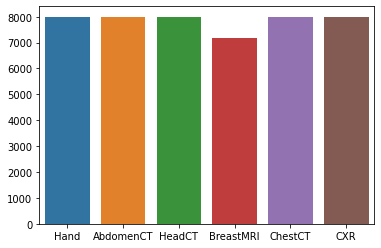

In [6]:
sns.barplot(x=class_names, y=no_imgs_class)

 - classes Hand, AbdomenCT, HradCT, ChestCT, and CXR have the same number of data, two thousand medical images, and a single class, BreastMRI, has fewer images, just over one thousand medical data, together we have 47163 medical images in our testing subset

<AxesSubplot:>

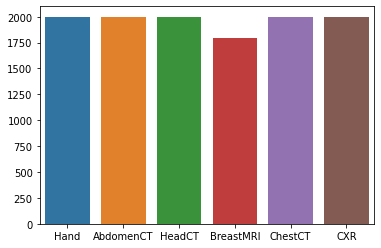

In [7]:
sns.barplot(x=class_names, y=no_imgs_class_test)

### Model design

 - concerning 6 classes and medical images, we decided to design a classifier model based on a convolutional neural network, which is used to classify or segment image data
 - from the exploratory data analysis, we see that it will be necessary to transform the pixel values to the same scale because currently, not all pixel values of medical images start and end at the same values
 
 ## Model

 - to implement the model, we decided to use the PyTorch module using the CUDA architecture to parallelize the calculations on the GPU
 - if the machine does not have a graphics processing unit that supports the CUDA architecture, then the calculations will run on the CPU, which is slower 

In [8]:
import numpy as np
import os
import time
%matplotlib inline
import matplotlib.pyplot as mp
import torch
import torchvision 

# run PyTorch on CUDA architecture
if torch.cuda.is_available():     
    dev = torch.device("cuda:0")
    kwar = {'num_workers': 8, 'pin_memory': True}
    cpu = torch.device("cpu")
else:
    print("Warning: CUDA not found, CPU only.")
    dev = torch.device("cpu")
    kwar = {}
    cpu = torch.device("cpu")

print(dev, kwar, cpu)

cuda:0 {'num_workers': 8, 'pin_memory': True} cpu


- display which PyTorch version are we using
- we have used PyTorch with version 1.10.1 and with CUDA architecture 11.3(1.10.1+cu113) on our local machine

In [9]:
print(torch.__version__) 

1.10.1+cu113


 - to properly extract information from pixels due to the grayscale color model, we increase the contrast and therefore scale the images to pixel values from 0 to 1
 - simultaneously, it is essential to convert JPEG images to data type tensors 

In [10]:
toTensor = torchvision.transforms.ToTensor()

# Load, scale, and stack image tensor
tensors = list()
for img_path in imgs_files:
    PIL_img = Image.open(img_path)
    # from PIL image, get a tensor
    tensor_img = toTensor(PIL_img)
    
    # the image isn't empty, rescale its values to run from 0 to 1
    if(tensor_img.min() < tensor_img.max()):  
        tensor_img = (tensor_img - tensor_img.min()) / (tensor_img.max() - tensor_img.min()) 
    
    # append list of tensors
    tensors.append(tensor_img)
    
# stack image (X) tensor
img_tensor = torch.stack(tensors) 
    
# Create label (Y) tensor
class_tensor = torch.tensor(img_class)  

# Get look at rescaled values
print(f'After rescaling, min pixel value: {img_tensor.min().item()} and max pixel value: {img_tensor.max().item()}')


# do this for testing
tensors_test = list()
for img_path in img_files_test:
    PIL_img = Image.open(img_path)
    # from PIL image, get a tensor
    tensor_img = toTensor(PIL_img)
    
    # the image isn't empty, rescale its values to run from 0 to 1
    if(tensor_img.min() < tensor_img.max()):  
        tensor_img = (tensor_img - tensor_img.min()) / (tensor_img.max() - tensor_img.min()) 
    
    # append list of tensors
    tensors_test.append(tensor_img)
    
# stack image (X) tensor
img_tensor_test = torch.stack(tensors_test) 
    
# Create label (Y) tensor
class_tensor_test = torch.tensor(img_class_test)  

After rescaling, min pixel value: 0.0 and max pixel value: 1.0


 - vytvoríme triedu nášho modelu založeného na konvolučnej umelej neurónovej sieti pomocou modulu PyTorch, pričom všetky výpočty budú rozdelené na grafickej jendotke pomocou architektúry CUDA, nevyhnutné, aby grafická karta a stroj podporovali CUDA architektúru  
 - ako aktivačnú funkciu sme vybrali RELU, ktorá nepredpokladá záporné hodnoty, môžme ju definovať ako __f(x) = max(0, x)__, kde __x__ je náš vstup, vzhľadom na to, že máme hodnoty pixelov od 0 po 255 vo farebnom modely grayscale, tak nemusíme pracovať so zápornými hodnotami

In [11]:
class CNN_ANN(torch.nn.Module):
    """
    :param torch.nn.Module: Base class for all neural network modules.
    
    Based on the architecture of the convolutional neural network with RELU.
    The number of labels = the output layer nodes.
    
    This model work only with images with 1 channel, so in grayscale color space for this particular assignment.
    """
    convolution = (5, 10)
    convolution_size = 7
     
    def __init__(self, img_width, img_height, no_labels): 
        """
        :param self: object
        :param img_width: Image's x dimension
        :param img_height: Image's y dimension
        :param no_labels: Number of labels
        
        Initialize a model based on the architecture of the convolutional neural network 
        with Rectified Linear Unit activation function. 
        
        We apply convolution tuple to pixels in our model, while in the convolution convolution_size is the number of surrounding pixels.
        Formula input_layer_no_nodes calculates last node in order to connect layers.
        
        Image's height with image's width decreases with each convolution, because it makes image smaller. 
        """       

        # Set constructor of torch.nn.Module in order set up the CNN_ANN class
        super(CNN_ANN,self).__init__()  

        # Set number of nodes for the input layer.
        self.input_layer_no_nodes = self.convolution[1]*(img_width-(self.convolution_size-1)-(self.convolution_size-1))*(img_height-(self.convolution_size-1)-(self.convolution_size-1))
   
        # Store weights between layers
        # Override atribures for base class.
        # nn.Conv2d(channels in, channels out, convolution height/width)        
        no_channels = 1 # grayscale, for RGB we would have 3 
        self.cnv1 = torch.nn.Conv2d(no_channels, self.convolution[0], self.convolution_size)
        self.cnv2 = torch.nn.Conv2d(self.convolution[0], self.convolution[1], self.convolution_size)


        # Define the number of output nodes for fully connected layers
        fully_connected_layer1_no_nodes = 400
        fully_connected_layer2_no_nodes = 80
        
        # Stores the weights between the fully connected layers
        # nn.Linear(nodes in, nodes out)
        self.weight_full_connected_layer1 = torch.nn.Linear(self.input_layer_no_nodes, fully_connected_layer1_no_nodes)
        self.weight_full_connected_layer2 = torch.nn.Linear(fully_connected_layer1_no_nodes, fully_connected_layer2_no_nodes)
        self.weight_full_connected_layer_final = torch.nn.Linear(fully_connected_layer2_no_nodes, no_labels)
        
    def forward(self,x):
        """
        :param self: An object
        :param x: Input layer.
        :returns x: Output layer.
        
        Define how to get the output of the neural network. Needs to be implemented. 
        This is called when the neural network is applied to an input.
        
        Define the steps used in the computation of output from input.
        Use the weights defined in the constructor.
        We use RELU activaciton function.
        """
        
        # Apply RELU activation fuction for first convolutional layer 
        x = torch.nn.functional.relu(self.cnv1(x)) 
        
        # Apply RELU activation fuction for second convolutional layer
        x = torch.nn.functional.relu(self.cnv2(x)) 
        
        # Connect convolutional layer into connected layer
        x = x.view(-1, self.num_flat_features(x)) 
        
        # Apply RELU activation fuction for first connected layer
        x = torch.nn.functional.relu(self.weight_full_connected_layer1(x)) 
        
        # Apply RELU activation fuction for second connected layer
        x = torch.nn.functional.relu(self.weight_full_connected_layer2(x)) 
        
        # Final connected layer without RELU, calculate loss function
        x = self.weight_full_connected_layer_final(x)        
        
        # Return final connected layer
        return x

    def num_flat_features(self, x):  
        """
        :param self: An object
        :param x: Input layer
        : returns 
        
        Change x to a vector. Needs to be explicitly implemented.
        """
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

 - vytvoríme inštanciu nášho modelu:

In [12]:
# create model object and pass all calculations to the GPU with CUDA architecture
model = CNN_ANN(img_width, img_height, no_classes).to(dev)

 - vytvoríme zoznam obrázkov pre trénovanie a testovanie, 47163 obrázkov máme pre trénovanie a 11791 pre testovanie

In [13]:
test_img_numbers = list()
train_img_numbers = list()

# Add imgs into train list
for i in range(no_total_img):
        train_img_numbers.append(i)
        
# Add imgs into test list
for i in range(no_total_img_train):
        test_img_numbers.append(i)
        
# Count the number in each set
no_img_train = len(train_img_numbers)  
no_img_test = len(test_img_numbers)
print("Training images =", no_img_train, "Testing =", no_img_test)

Training images = 47163 Testing = 11791


 - vytvoríme tensor dátové typy pre trénovanie a testovanie:

In [14]:
train_ids = torch.tensor(train_img_numbers)    
test_ids = torch.tensor(test_img_numbers)
trainX = img_tensor[train_ids,:,:,:]
trainY = class_tensor[train_ids]
testX = img_tensor_test[test_ids,:,:,:]
testY = class_tensor_test[test_ids]

 - natrénujeme našu neurónovu sieť modelu v 10 epochách:

In [15]:
# Setting too large batch size will cause an out-of-memory error.
batch_size = 300           

# Number of training batches per epoch, round down to simplify last batch
trainBats = no_img_train // batch_size       

# Test batches, round up to include all
testBats = -(-no_img_test // batch_size)     

# Take into the account the imbalanced dataset.
weights = torch.zeros(no_classes)     

# Rarer images are counted more to the loss, so we prevent the model from ignoring rarer images.
for i in trainY.tolist():            
    weights[i].add_(1)              
    
# Weights should be inversely related to count
weights = 1. / weights.clamp_(min=1.)                     

# The weights average to 1, send to CUDA
weights = (weights * no_classes / weights.sum()).to(dev)

# Initialize an optimizer, lr means learning rate
optimizerSGD = torch.optim.SGD(model.parameters(), lr = 0.01)   

# Max training epochs = 10
for epoch in range(0, 10, 1):
    # Set model to training mode
    model.train()                     
    loss_epoch = 0.
    # Shuffle data to randomize batches
    permute = torch.randperm(no_img_train)  
    trainX = trainX[permute,:,:,:]
    trainY = trainY[permute]
    # Iterate over batches
    for j in range(trainBats):        
        # Zero out gradient accumulated in optimizer
        optimizerSGD.zero_grad()              
        # Slice shuffled data into batches
        batX = trainX[j*batch_size:(j+1)*batch_size,:,:,:].to(dev)   
        # .to(dev) moves these batches to the GPU
        batY = trainY[j*batch_size:(j+1)*batch_size].to(dev)    
        # Evalute predictions
        yOut = model(batX)            
        # Compute loss
        loss = torch.nn.functional.cross_entropy(yOut, batY,weight=weights) 
        # Add loss
        loss_epoch += loss.item()   
        # Backpropagate loss
        loss.backward()          
        # Update model weights using optimizer
        optimizerSGD.step()    
    print(f"Epoch = {epoch}; Training loss = {loss_epoch}")
    

Epoch = 0; Training loss = 146.43627820909023
Epoch = 1; Training loss = 26.841743130236864
Epoch = 2; Training loss = 21.40828127786517
Epoch = 3; Training loss = 10.7601820230484
Epoch = 4; Training loss = 7.677139786072075
Epoch = 5; Training loss = 6.502034819684923
Epoch = 6; Training loss = 19.35174631047994
Epoch = 7; Training loss = 5.856186275370419
Epoch = 8; Training loss = 4.208227928727865
Epoch = 9; Training loss = 3.2181634549051523


 - náš model mal korektné predikcie na testovaných dátach 11706 / 11791, čo predstavuje približne 99% úspešnosť:

In [16]:
# Set an empty confusion matrix
confusion_matrix = np.zeros((no_classes,no_classes),dtype=int)    
model.eval()
with torch.no_grad():
    # Shuffle test data
    permute = torch.randperm(no_img_test)                     
    testX = testX[permute,:,:,:]
    testY = testY[permute]
    
    # Iterate over test batches
    for j in range(testBats):                           
        batX = testX[j*batch_size:(j+1)*batch_size,:,:,:].to(dev)
        batY = testY[j*batch_size:(j+1)*batch_size].to(dev)
        
        # Pass test batch through model
        yOut = model(batX)                 
        
        # Generate predictions by finding the max Y values
        pred = yOut.max(1,keepdim=True)[1]     
        
        # Bind actual and predicted to
        for j in torch.cat((batY.view_as(pred), pred),dim=1).tolist(): 
            # make (row, col) pairs, increment confusion matrix
            confusion_matrix[j[0],j[1]] += 1   
            
# Sum over diagonal elements to count correct predictions
correct_predictions = 0
for i in range(0, no_classes, 1):
    correct_predictions += confusion_matrix[i,i] 
print("Correct predictions: ", correct_predictions, "/", no_img_test)
print("Confusion Matrix:\n", confusion_matrix)

Correct predictions:  11706 / 11791
Confusion Matrix:
 [[1988    2    6    1    0    3]
 [   0 1990    4    1    5    0]
 [   5    7 1982    0    6    0]
 [   0    0    0 1789    2    0]
 [   0    1    2    3 1994    0]
 [  37    0    0    0    0 1963]]


## Záver

 - pre implementáciu modelu konvolučnej neurónovej sieti sme sa rozhodli použiť Python modul PyTorch s využitím CUDA architektúry pre paralelizáciu výpočtov na GPU
 - úspešnosť nášho modelu je približne 99%, vo viacerých spúšťaniach sa nám úspešnosť pohybovala medzi 97% až 99%
 - model by sa dal zlepšiť analyzovaním obrázkov, ktoré model nevedel správne vyhodnotiť
 - na našich dátach sme neriešili overfitting(model je príliš natrénovaný na trénovacie dáta) ani underfitting(model nevie zachytiť štruktúru dát), do budúcna by bolo vhodné zlepšiť tento model validáciou na overfitting
 - ďalším zlepšením by mohla byť vlastná loss funkcia, ktorá by mohla zlepšiť predikcie modelu
 - ako alternatívu ku konvolučnej neurónovej sieti by sme mohli zvážiť UNet alebo UNet++, čo sú neurónove siete založené na konvolučnej neurónovej sieti špeciálne pre medicínske obrázky
 - ako ďalšia alternatíva pripadá do úvahy kombinácia spomínaných neurónových sieti - konvolučnej a UNet, ktorá sa nazýva aj ako kaskadová konvolučná sieť s UNet, čo sa používa pri segmentovaní a klasifikovaní buniek v medicínskych dátach, avšak v našom prípade nemáme dáta s bunkami, tak v tomto prípade, by výsledky nemuseli byť lepšie
 
## Bibliography

[1] Medical MNIST Classification, apolanco3225, 2017, GitHub, GitHub repository, https://github.com/apolanco3225/Medical-MNIST-Classification

[2] Exploratory Data Analysis Ideas for Image Classification, Eunjoo Byeon, towards data science, article, https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2